# n_ai problem eda

### Ideas:

1. Scale data
2. Try nonlinear features
3. Try to use clusterization
4. Try t 

### Journal

10.06.2016
Пробовал сделать кластеризацию с помощью K-means. На Кроссвалидаации показатели немного улучшились (на десятитысячные), на numerai - ухудшились.

14.06.2016
Первый значимый результат, использование совместно двух датасетов (с прошлого и текущего этапов) дало прирост на реальных данных. Нужно попробовать обучить модели специально для совмещенных датасетов.

17.06.2016
feature1, feature6, feature19 определенно связаны с прошлыми событиями. Нужно научиться это испольовать.

данные отсортированные в порядке:
f6, f19, f1: 0.69097239590630155 ведут себя значительно лучше случайной выборки. Есть структура.
еще лучший результат дает связка
f6, f1: 0.690968450612
используя сортировку только по 
f6: 0.691126287812

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import normalize

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
%matplotlib inline
plt.style.use('ggplot')

random_state = 42

D:\soft\dev\anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
data = pd.read_csv('./../data/nai_train_2.csv')
data.head(2)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,target
0,0.943745,0.40144,0.052459,0.251756,0.599198,0.433079,0.154292,0.921624,0.089638,0.117733,...,0.823646,0.196164,0.712755,0.86763,0.409075,0.307076,0.949682,0.607616,0.417547,1
1,0.929175,0.86327,0.905306,0.698717,0.416503,0.770084,0.626188,0.738225,0.568635,0.675989,...,0.810103,0.784314,0.614979,0.59866,0.314625,0.977315,0.711697,0.304693,0.768250,0


In [3]:
test_data = pd.read_csv('./../data/nai_test_2.csv')
test_data.head(2)

,t_id,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21
0,19778,0.607656,0.307651,0.058045,0.234352,0.890180,0.517335,0.542164,0.284514,0.264094,...,0.569874,0.596151,0.413212,0.455846,0.415088,0.709330,0.246704,0.191077,0.671681,0.414686
1,21465,0.019469,0.862912,0.711874,0.310788,0.785673,0.314365,0.946540,0.025331,0.874238,...,0.993083,0.959947,0.262189,0.989967,0.973802,0.794051,0.704770,0.083737,0.916388,0.035524


In [9]:
# To use all datasets
data_current = pd.read_csv('./../data/nai_train_2.csv')
data_old = pd.read_csv('./../data/nai_train.csv')
data = pd.concat([data_current, data_old])

X = data.drop(['target'], axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state)

In [4]:
# To use current dataset
data = pd.read_csv('./../data/nai_train_2.csv')
X = data.drop(['target'], axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state)

In [5]:
from sklearn.grid_search import GridSearchCV

def grid_search_clf(clf_to_train, param_grid, X_train, y_train, to_print=False):
    clf = GridSearchCV(estimator=clf_to_train, param_grid=param_grid,
                   n_jobs=-1, scoring='log_loss', verbose=True)
    clf.fit(X_train, y_train)
    if to_print:
        print('best score: {0}'.format(clf.best_score_))
        print('best estimator:')
        print(clf.best_estimator_)
    return clf

def clf_score(clf, X_test, y_test):
    clf_probs = clf.predict_proba(X_test)
    return log_loss(y_test, clf_probs)

def get_ans(clf, X, y, test_data, transform=False):
    X_real_test = test_data.drop(['t_id'], axis=1)
    if transform:
        X_real_test = transform_data(X_real_test)
    clf.fit(X, y)
    real_pred = clf.predict_proba(X_real_test)
    pred = [it[1] for it in real_pred]
    ans = pd.DataFrame(test_data['t_id'])
    ans['probability'] = pred
    return ans

## Plotting

feature1


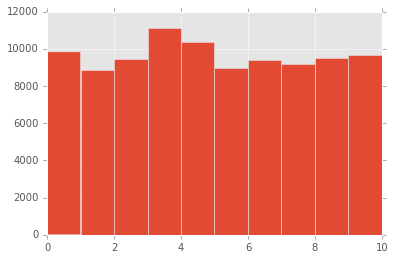

feature2


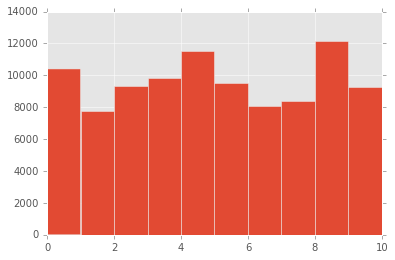

feature3


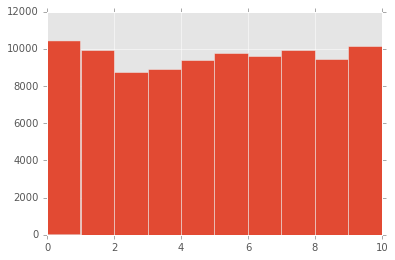

feature4


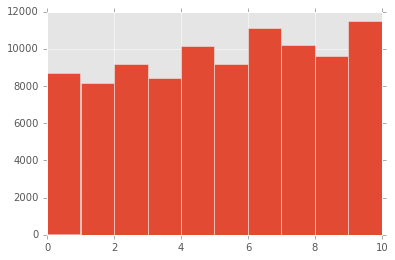

feature5


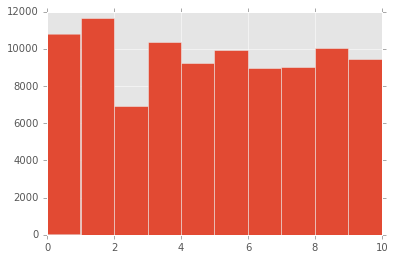

feature6


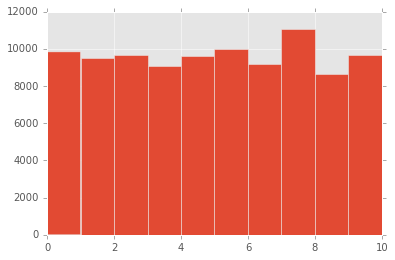

feature7


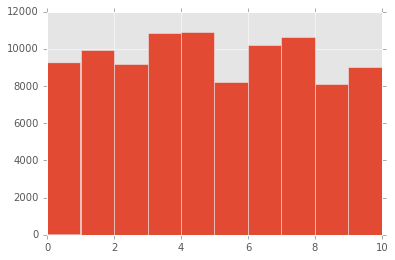

feature8


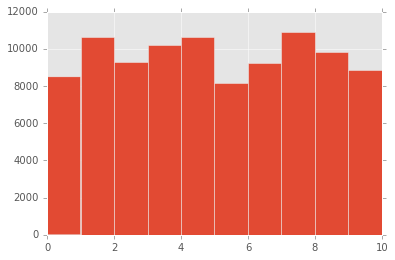

feature9


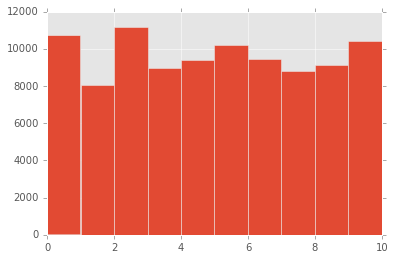

feature10


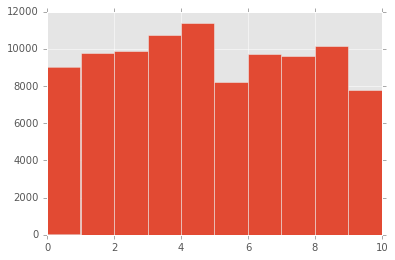

feature11


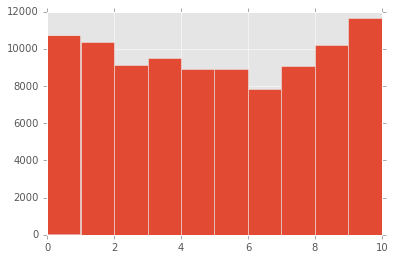

feature12


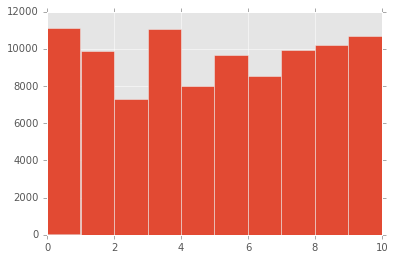

feature13


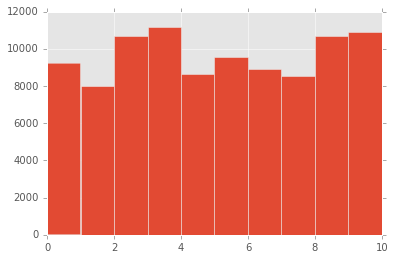

feature14


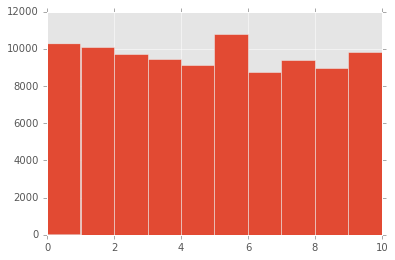

feature15


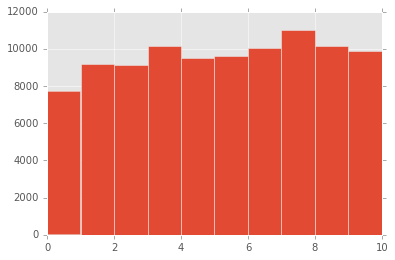

feature16


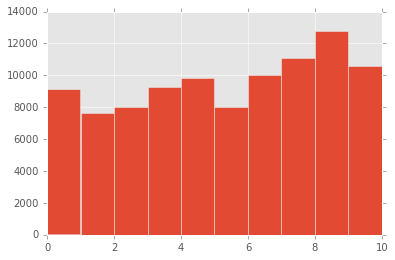

feature17


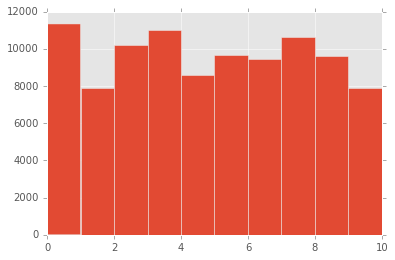

feature18


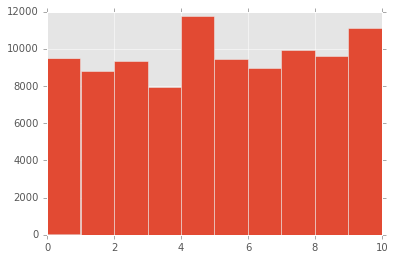

feature19


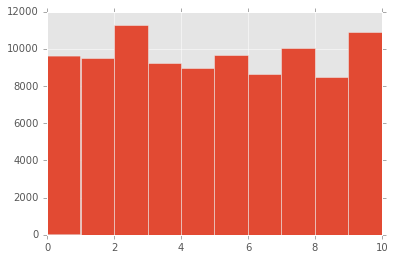

feature20


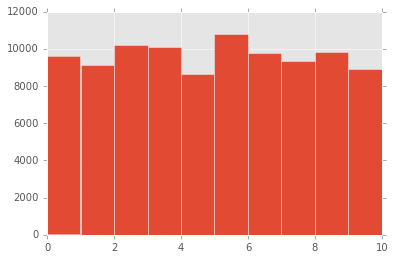

feature21


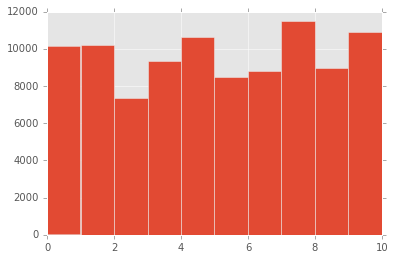

target


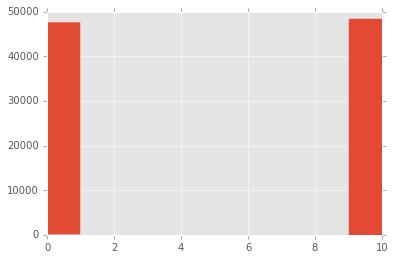

In [29]:
def prepare_hist(feature):
    bins = ((feature * 100 / 10)).astype(int)
    bins.hist()
    plt.show()
#     print bins
    
for feature in data.columns:
    print(feature)
    prepare_hist(data[feature])

feature1


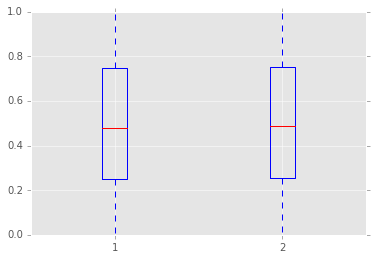

feature2


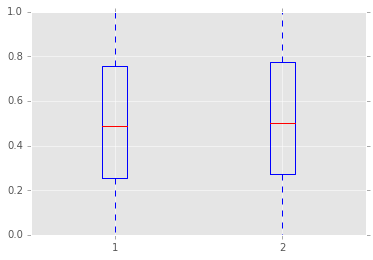

feature3


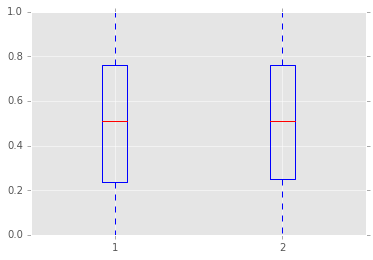

feature4


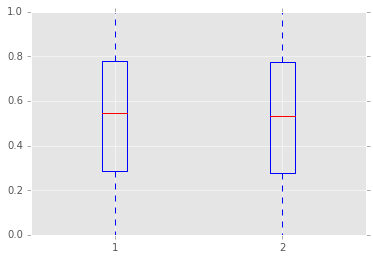

feature5


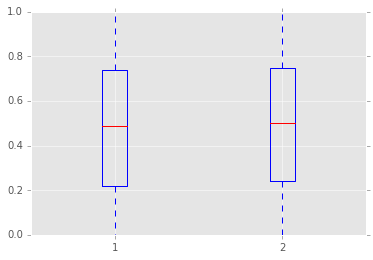

feature6


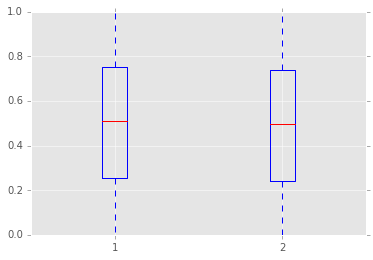

feature7


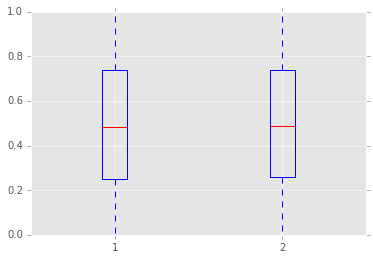

feature8


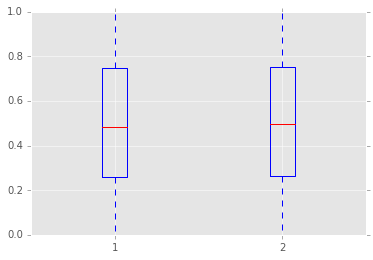

feature9


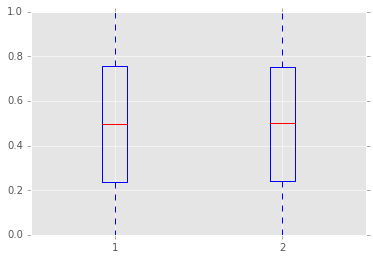

feature10


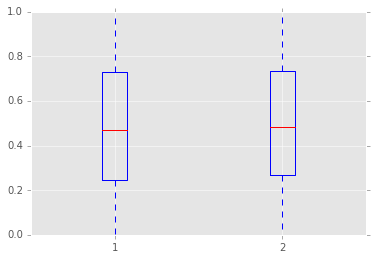

feature11


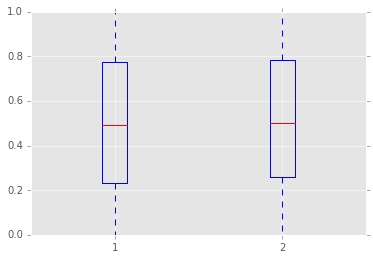

feature12


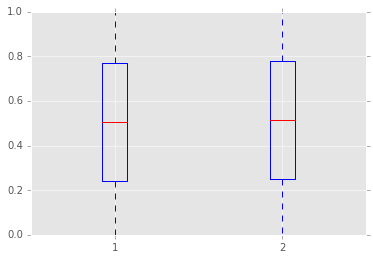

feature13


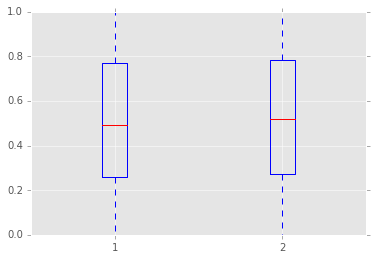

feature14


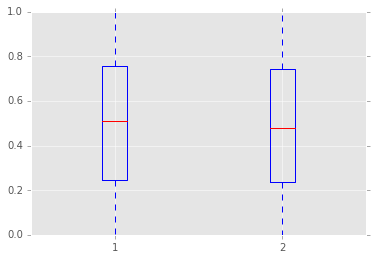

feature15


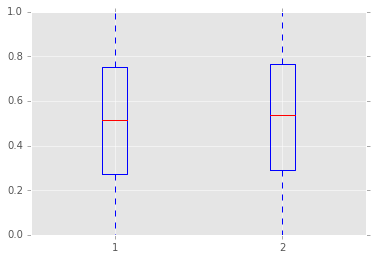

feature16


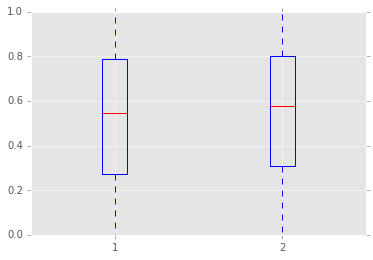

feature17


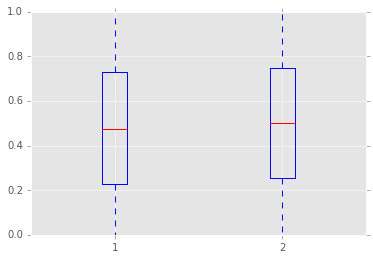

feature18


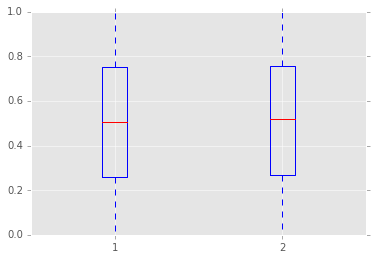

feature19


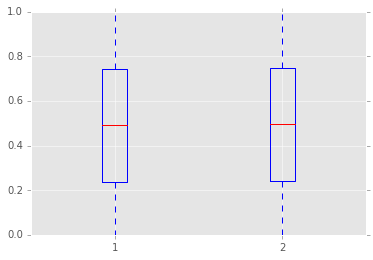

feature20


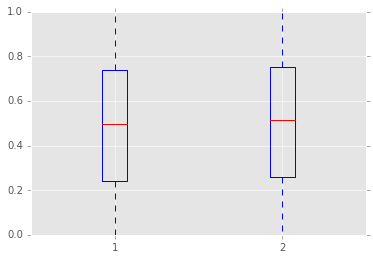

feature21


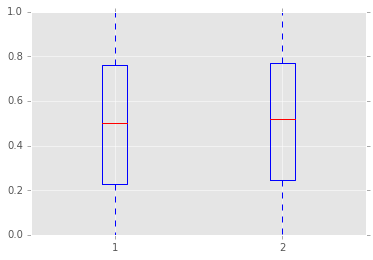

(-0.01848987936977098, 'feature15')
(-0.01758547476158001, 'feature16')
(-0.01681327071361438, 'feature17')
(-0.01394298137955785, 'feature13')
(-0.013804658825818994, 'feature20')
(-0.012726298224279453, 'feature11')
(-0.012631013543102587, 'feature5')
(-0.012264002305601873, 'feature2')
(-0.011625465340650343, 'feature21')
(-0.0105518385439613, 'feature10')
(-0.007414822275531918, 'feature18')
(-0.00737177560109159, 'feature12')
(-0.005292298445007615, 'feature8')
(-0.004067018673320544, 'feature3')
(-0.0035831971090640735, 'feature1')
(-0.0027252150525598484, 'feature7')
(-0.001690159266203639, 'feature19')
(-0.001057353084949808, 'feature9')
(0.008122562799113664, 'feature6')
(0.009364393105576796, 'feature4')
(0.014688679587229192, 'feature14')


In [42]:
def prepare_plot(x):
    plt.boxplot(x)# plot(target, feature)
    plt.show()

data_neg = data[data['target']==0]
data_pos = data[data['target']==1]
means_diff = []
for feature in data.columns:
    if feature == 'target':
        continue
    print(feature)
    means_diff.append((data_neg[feature].mean() - data_pos[feature].mean(), feature))
    prepare_plot([data_neg[feature], data_pos[feature]])
    
for mean in sorted(means_diff):
    print mean

In [50]:
corr_matrix = data.drop('target', axis=1).corr().replace(1.0, 0)
corr_matrix.abs().max()

# There are very correlated features
# TODO: Try to use regression with l1 to remove some features.

feature1     0.793415
feature2     0.753525
feature3     0.849208
feature4     0.857202
feature5     0.815433
feature6     0.778462
feature7     0.806859
feature8     0.793415
feature9     0.806859
feature10    0.789887
feature11    0.806889
feature12    0.772281
feature13    0.810960
feature14    0.857202
feature15    0.843541
feature16    0.843541
feature17    0.855935
feature18    0.849208
feature19    0.697613
feature20    0.855935
feature21    0.806889
dtype: float64

In [72]:
data.drop('target', axis=1).corrwith(data['target']).abs()

feature1     0.006226
feature2     0.021135
feature3     0.006928
feature4     0.016158
feature5     0.021573
feature6     0.014142
feature7     0.004797
feature8     0.009250
feature9     0.001805
feature10    0.018754
feature11    0.021169
feature12    0.012331
feature13    0.023864
feature14    0.025301
feature15    0.032704
feature16    0.030057
feature17    0.029178
feature18    0.012800
feature19    0.002888
feature20    0.024090
feature21    0.019812
dtype: float64

## Nonlinear data

In [100]:
def transform_data(X):
    nonlin_X = X.copy()
    for col in nonlin_X.columns:
        nonlin_X[col + '_sq'] = nonlin_X[col] ** 2
        nonlin_X[col + '_cube'] = nonlin_X[col] ** 3
#         nonlin_X[col + '_log'] = np.log(nonlin_X[col + '_sq'])
#     nonlin_X = normalize(X)
    return nonlin_X

In [60]:
nonlin_X = transform_data(X)

X_train, X_test, y_train, y_test = train_test_split(
    nonlin_X, y, test_size=0.33, random_state=random_state)

NameError: name 'transform_data' is not defined

### Adding cluster feature

In [19]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

def add_clust_feature(clst, data):
    if 't_id' in data.columns:
        clust_cols = pd.get_dummies(clst.predict(data.drop('t_id', axis=1)))
    else:
        clust_cols = pd.get_dummies(clst.predict(data))
    clust_cols.index = data.index
    res_data = pd.concat([data, clust_cols], axis=1)
    return res_data

In [21]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

n_clusters = 8

X = data.drop(['target'], axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state)

clst = KMeans(n_clusters=n_clusters)
clst.fit(X_train);

X_train = add_clust_feature(clst, X_train)
X_test = add_clust_feature(clst, X_test)

In [130]:
# log_regression with k-means:
# 8 clusters: 0.691434677453
# 3 clusters: 0.691446751304

# 2 clusters: 0.691472370854
# 5 clusters: 0.691487633242
# 4 clusters: 0.691593318766
# 5 clusters: 0.691520027025

# Random forest

In [ ]:
clf_rf = RandomForestClassifier(random_state=random_state)

param_grid = {
    'n_estimators': [10, 30, 50, 100, 150, 200],
#     'criterion': ['gini', 'entropy'],
#     'max_features': ['sqrt', 'log2']
#     'max_depth': [i for i in range(2, 16)]#,
    'min_samples_split': [1, 3, 6],
    'min_samples_leaf': [1, 3, 6]
    
}

clf = grid_search_clf(clf_rf, param_grid, X_train, y_train)
print('log_loss: {0}'.format(clf_score(clf, X_test, y_test)))

In [40]:
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=None, max_features='auto', max_leaf_nodes=None,
#             min_samples_leaf=6, min_samples_split=1,
#             min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
#             oob_score=False, random_state=42, verbose=0, warm_start=False)
# log_loss: 0.694575344696

In [16]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=6, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=181, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

ans = get_ans(clf, X, y, test_data)
ans.to_csv('test_ans.csv', index=False)

# Log regression

In [ ]:
clf_log_reg = LogisticRegression(random_state=random_state, n_jobs=-1)

param_grid = {
    'penalty' : ['l1'], # 'l1'
    'C': [0.01, 1, 10, 100, 1000, 10000], #np.linspace(0.0001, 1.0, 20),
#     'solver': ['newton-cg', 'lbfgs', 'sag'] 
}

clf = grid_search_clf(clf_log_reg, param_grid, X_train, y_train)
print('log_loss: {0}'.format(clf_score(clf, X_test, y_test)))

# 0.69146324303

In [ ]:
#  0.69091 on real data
# (only current data)
# Fitting 3 folds for each of 90 candidates, totalling 270 fits
# best score: -0.691881892887
# best estimator:
# LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#           penalty='l2', random_state=42, solver='sag', tol=0.0001,
#           verbose=0, warm_start=False)
# log_loss: 0.691494844159

In [ ]:
# WITH 8 Clusters using k-means 0.69109 on real data
# (only current data)
# Fitting 3 folds for each of 90 candidates, totalling 270 fits
# best score: -0.691983447855
# best estimator:
# LogisticRegression(C=0.034579310344827592, class_weight=None, dual=False,
#           fit_intercept=True, intercept_scaling=1, max_iter=100,
#           multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
#           solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
# log_loss: 0.691421420986


In [14]:
clf = LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
    intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
    penalty='l2', random_state=42, solver='sag', tol=0.0001,
    verbose=0, warm_start=False)

ans = get_ans(clf, X, y, test_data)
ans.to_csv('test_ans.csv', index=False)

In [22]:
# 0.69109 on real data
clst = KMeans(n_clusters=n_clusters)
clst.fit(X);

X_clust = add_clust_feature(clst, X)
test_data_clust = add_clust_feature(clst, test_data)

clf = LogisticRegression(C=0.034579310344827592, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

ans = get_ans(clf, X_clust, y, test_data_clust)
ans.to_csv('test_ans3.csv', index=False)

In [ ]:
#
# Fitting 3 folds for each of 90 candidates, totalling 270 fits
# best score: -0.691929279678
# best estimator:
# LogisticRegression(C=0.034579310344827592, class_weight=None, dual=False,
#           fit_intercept=True, intercept_scaling=1, max_iter=100,
#           multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
#           solver='sag', tol=0.0001, verbose=0, warm_start=False)
# log_loss: 0.69146868926

In [20]:
# TOP RESULT: 0.69065 on real data

# Test using two datasets.
clf = LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
    intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
    penalty='l2', random_state=42, solver='sag', tol=0.0001,
    verbose=0, warm_start=False)

data = pd.read_csv('./../data/nai_train_2.csv')
additional_data = pd.read_csv('./../data/nai_train.csv')
all_data = pd.concat([data, additional_data])

X = all_data.drop(['target'], axis=1)
y = all_data['target']

ans = get_ans(clf, X, y, test_data)
ans.to_csv('test_ans6.csv', index=False)

In [30]:
# LOGLOSS 0.69074 on real data ?? wtf, clf not set.
LogisticRegression(C=0.17249655172413794, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

ans = get_ans(clf, X, y, test_data)
ans.to_csv('test_ans7.csv', index=False)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.8min finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [41]:
# Using log_loss from XGBoost
clf = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=42, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

test_data = pd.read_csv('./../data/nai_test_2.csv')
# test_data['proba'] = clf_xgb.predict_proba(test_data.drop(['t_id'], axis=1))
test_data_xgb = test_data.copy()
test_data_xgb['proba'] = clf_xgb.predict_proba(test_data.drop(['t_id'], axis=1))[:, 1]
ans = get_ans(clf, X, y, test_data_xgb)
ans.to_csv('test_ans9.csv', index=False)

# Compositions

In [115]:
# This composition doesn't work
# LOGLOSS 0.69335
clf1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=6, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=181, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

clf2 = LogisticRegression(C=0.009, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

clf3 = LogisticRegression(C=0.004, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

clf4 = LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

# What if try differen algorithms with different waights ?
ans1 = get_ans(clf1, X, y, test_data)
ans2 = get_ans(clf2, X, y, test_data)
ans3 = get_ans(clf2, X, y, test_data)
ans4 = get_ans(clf, transform_data(X), y, test_data, transform=True)

In [116]:
compos_ans = pd.DataFrame(test_data['t_id'])
compos_ans['probability'] = (ans1['probability'] + ans2['probability'] +
                            ans3['probability'] + ans4['probability']) / 4.

compos_ans.to_csv('test_ans.csv', index=False)

## Tests

In [62]:
X = data[['feature15', 'feature14']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state)

In [63]:
clf_rf = RandomForestClassifier(random_state=random_state)

param_grid = {
    'n_estimators': [10, 30, 50, 100, 150, 200],
    'min_samples_split': [1, 3, 6],
    'min_samples_leaf': [1, 3, 6]
    
}

clf = grid_search_clf(clf_rf, param_grid, X_train, y_train)
print('log_loss: {0}'.format(clf_score(clf, X_test, y_test)))

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  4.8min finished


Fitting 3 folds for each of 54 candidates, totalling 162 fits
best score: -0.716290002778
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=6, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
log_loss: 0.718744502298


In [88]:
# best: 'feature15', 'feature14' | 0.692590268446
# 0.691447198504
# 0.6914463265

# NOT: feature6 - from bottom 'feature12' - from top

X = data[['feature15', 'feature16',
          'feature10', 'feature21', 'feature2', 'feature18',
          'feature5', 'feature11', 'feature20', 'feature13', 'feature17',
          'feature14', 'feature4']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state)

clf_log_reg = LogisticRegression(random_state=random_state)

param_grid = {
    'penalty' : ['l2'], # 'l1'
    'C': np.linspace(0.00001, 0.1, 40),
    'solver': ['newton-cg', 'lbfgs', 'sag'] 
}

clf = grid_search_clf(clf_log_reg, param_grid, X_train, y_train)
print('log_loss: {0}'.format(clf_score(clf, X_test, y_test)))

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   37.3s finished


Fitting 3 folds for each of 120 candidates, totalling 360 fits
best score: -0.691955119629
best estimator:
LogisticRegression(C=0.010265384615384615, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)
log_loss: 0.6914463265


In [ ]:
# Fitting 3 folds for each of 120 candidates, totalling 360 fits
# best score: -0.691955119629
# best estimator:
# LogisticRegression(C=0.010265384615384615, class_weight=None, dual=False,
#           fit_intercept=True, intercept_scaling=1, max_iter=100,
#           multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
#           solver='sag', tol=0.0001, verbose=0, warm_start=False)
# log_loss: 0.6914463265

In [99]:
test_data = pd.read_csv('./../data/nai_test_2.csv')

clf = LogisticRegression(C=0.010265384615384615, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)


features = ['feature15', 'feature16', 'feature10', 'feature21',
        'feature2', 'feature18', 'feature5', 'feature11', 'feature20',
        'feature13', 'feature17', 'feature14', 'feature4']

test_data[features]
test_data[features]

ans = get_ans(clf, data[features], y, test_data[features + ['t_id']])
ans.to_csv('test_ans2.csv', index=False)

## XGB

In [6]:
import xgboost as xgb


param_grid = {
     'max_depth' : [3, 5, 8],
    'n_estimators' : [25, 50, 100],
    'learning_rate': np.linspace(0.0001, 1, 5),
}

xclf = xgb.XGBClassifier()

clf = grid_search_clf(xclf, param_grid, X_train, y_train)

# xclf = xgb.XGBClassifier(max_depth=3, n_estimators=300,
#                   learning_rate=0.05).fit(X_train, y_train)

print clf

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  2.9min finished


Fitting 3 folds for each of 45 candidates, totalling 135 fits
best score: -0.692903105464
best estimator:
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.25007499999999999, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=25,
       nthread=-1, objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [25, 50, 100], 'learning_rate': array([  1.00000e-04,   2.50075e-01,   5.000

In [33]:
import xgboost as xgb

X = data.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state+5)

clf_log = LogisticRegression(C=0.17249655172413794, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
clf_log.fit(X_train, y_train)
pred_log = clf_log.predict_proba(X_test)

clf_xgb = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.25007499999999999, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=25,
       nthread=-1, objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
clf_xgb.fit(X_train, y_train)
pred_xgb = clf_xgb.predict_proba(X_test)

clf_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
        max_depth=None, max_features='auto', max_leaf_nodes=None,
        min_samples_leaf=6, min_samples_split=1,
        min_weight_fraction_leaf=0.0, n_estimators=181, n_jobs=1,
        oob_score=False, random_state=42, verbose=0, warm_start=False)
clf_forest.fit(X_train, y_train)
pred_forest = clf_xgb.predict_proba(X_test)

pred_fin = (pred_log + pred_xgb + pred_forest) / 2.

log_loss(y_test, pred_fin)

# clf_xgb.fit(X_train, y_train)
# print('log_loss: {0}'.format(clf_score(clf_xgb, X_test, y_test)))

# ans = get_ans(clf, X, y, test_data)
# ans.to_csv('test_ans8.csv', index=False)

0.69158930426112608

# knn

In [9]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [25, 35, 45, 65]
}

clf = grid_search_clf(clf_knn, param_grid, X_train, y_train)

print('log_loss: {0}'.format(clf_score(clf, X_test, y_test)))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
best score: -0.698582980049
best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=65, p=2,
           weights='uniform')
log_loss: 0.698787934576


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  4.4min finished


In [ ]:
pred_data = clf.predict_proba(X)

### PCA

In [37]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_comp = pca.fit_transform(X)

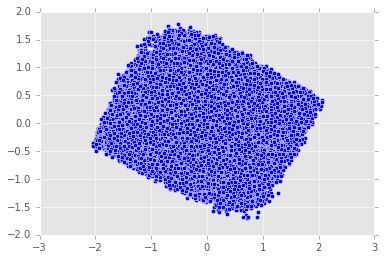

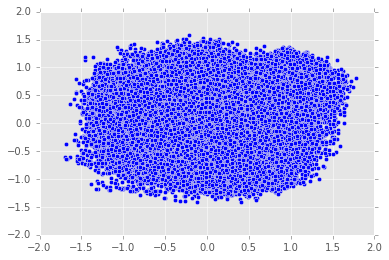

In [36]:
plt.scatter(new_comp[:,0], new_comp[:,1])
plt.show()

In [ ]:
param_grid = {
    'penalty' : ['l1'], # 'l1'
    'C': [0.01, 0.1, 1, 10, 100]
}

clf = grid_search_clf(clf_log_reg, param_grid, X_train, y_train)
print('log_loss: {0}'.format(clf_score(clf, X_test, y_test)))

In [19]:
def get_sorted_data(feature):
    sorted_data = data.sort(columns=feature).copy()
    rows = data.shape[0]
    train = 0.8
    test = 1 - train
    X = sorted_data.drop('target', axis=1)
    y = sorted_data['target']
    get_rows = int(rows * train)
    X_train, X_test = X[:int(rows * train)], X[int(rows * train):]
    y_train, y_test = y[:int(rows * train)], y[int(rows * train):]
    return X_train, X_test, y_train, y_test


def get_sorted_data_with_swap(feature):
    sorted_data = data.sort(columns=feature).copy()
    rows = data.shape[0]
    train = 0.8
    test = 1 - train
    X = sorted_data.drop('target', axis=1)
    y = sorted_data['target']

    for col in X.columns:
        feature_swapped = np.zeros_like(y)
        for i in range(len(y)):
            feature_swapped[i] = X[col][(i-1) % len(y)]
        X['prev_' + col] = feature_swapped

    get_rows = int(rows * train)
    X_train, X_test = X[:int(rows * train)], X[int(rows * train):]
    y_train, y_test = y[:int(rows * train)], y[int(rows * train):]
    return X_train, X_test, y_train, y_test

def test_log_regression(X_train, X_test, y_train, y_test):
    clf_log_reg = LogisticRegression(random_state=random_state, n_jobs=-1)

    param_grid = {
        'penalty' : ['l1'], # 'l1'
        'C': [0.001, 0.01, 1, 10, 100, 1000]
    }

    clf = grid_search_clf(clf_log_reg, param_grid, X_train, y_train)
    
    print 'prev: ', clf.best_estimator_.coef_[0]
    
    score = clf_score(clf, X_test, y_test)
#     print('log_loss: {0}'.format(score))
    return score

In [48]:
combinations = [['feature6', 'feature1']]

res = []
for feature in combinations:#data.columns:
    feature = list(feature)
    print feature
    
    if feature == 'target':
        continue
    X_train, X_test, y_train, y_test = get_sorted_data_with_swap(feature) #get_sorted_data(feature)
    score = test_log_regression(X_train, X_test, y_train, y_test)
    print('>> {0} : {1}'.format(feature, score))
    print('\n=====\n\n')
    res.append(score)

['feature6', 'feature1']
Fitting 3 folds for each of 6 candidates, totalling 18 fits

D:\soft\dev\anaconda\lib\site-packages\IPython\kernel\__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   10.0s finished



prev:  [-0.0735214   0.14823396 -0.17537539  0.14434279 -0.02375045  0.08973522
 -0.00671719  0.07967715 -0.03864035  0.07427045  0.08394221  0.11196116
 -0.00143327 -0.30196837  0.08711229  0.09855847  0.19167798  0.13742754
  0.06447984 -0.06667584 -0.01579699  0.         -0.43470229 -0.07231107
  0.24776223 -0.3486197  -0.21491375 -0.04615162  0.          0.02280682
 -0.39001575  0.         -0.33149805  0.         -0.394748    0.
 -0.26999196 -0.16012582  0.16076492 -0.1569512  -0.04219554 -0.1359416 ]
>> ['feature6', 'feature1'] : 0.690968450612

=====




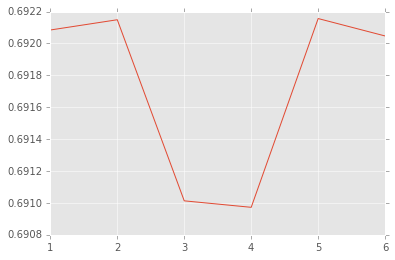

(0.69097239590630155, 4)
(0.69101302570254897, 3)
(0.6920471132161623, 6)
(0.69208457273754564, 1)
(0.69214890532108753, 2)
(0.69215642482987738, 5)


In [21]:
plt.plot(range(1, len(res)+1), res)
plt.show()
res_scores = [(s, i+1) for i, s in enumerate(res)]

for i in sorted(res_scores):
    print(i)

In [29]:
def test_rf(X_train, X_test, y_train, y_test):
    clf_rf = RandomForestClassifier(random_state=random_state)
    param_grid = {
         'criterion': ['gini', 'entropy'],
         'max_features': ['sqrt', 'log2']
    }
    clf = grid_search_clf(clf_rf, param_grid, X_train, y_train)
    score = clf_score(clf, X_test, y_test)
#     print('log_loss: {0}'.format(score))
    return score
    
res = []
for feature in data.columns:
    if feature == 'target':
        continue
    X_train, X_test, y_train, y_test = get_sorted_data(feature)
    score = test_rf(X_train, X_test, y_train, y_test)
    print('>> feature : {0} : {1}'.format(feature, score))
    res.append(score)

D:\soft\dev\anaconda\lib\site-packages\IPython\kernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from IPython.kernel.zmq import kernelapp as app
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.8s finished


Fitting 3 folds for each of 4 candidates, totalling 12 fits
best score: -2.72040060775
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature1 : 0.80507328931
Fitting 3 folds for each of 4 candidates, totalling 12 fits
best score: -6.20064747877
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature2 : 0.801772620812
Fitting 3 folds for each of 4 c

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.9s finished



best score: -3.40551290785
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature3 : 0.78055794064
Fitting 3 folds for each of 4 candidates, totalling 12 fits
best score: -6.78820170685
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature4 : 0.798181085568
Fitting 3 folds for each of 4 candidates, totalling 12 fits

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.8s finished



best score: -6.39500158915
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature5 : 0.797753574287
Fitting 3 folds for each of 4 candidates, totalling 12 fits
best score: -6.84504773514
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature6 : 0.80963490219
Fitting 3 folds for each of 4 candidates, totalling 12 fits

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.8s finished



best score: -5.10865951455
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature7 : 0.776372420476
Fitting 3 folds for each of 4 candidates, totalling 12 fits
best score: -4.59149868428
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature8 : 0.786361316891
Fitting 3 folds for each of 4 candidates, totalling 12 fits

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.7s finished
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.9s finished



best score: -5.53410139305
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature9 : 0.786551458344
Fitting 3 folds for each of 4 candidates, totalling 12 fits
best score: -6.25421586749
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature10 : 0.802147486075

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.6s finished
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.9s finished



Fitting 3 folds for each of 4 candidates, totalling 12 fits
best score: -5.65544500514
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature11 : 0.787794556313
Fitting 3 folds for each of 4 candidates, totalling 12 fits
best score: -4.52596251705
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature12 : 0.79555540622
Fitting 3 folds for each of 

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   13.0s finished
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.7s finished



best score: -6.79927553823
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature13 : 0.790163626834
Fitting 3 folds for each of 4 candidates, totalling 12 fits
best score: -5.76236577946
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature14 : 0.793193402701
Fitting 3 folds for each of 4 candidates, totalling 12 fits

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.8s finished
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   13.7s finished



best score: -7.8190290722
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature15 : 0.79350830751
Fitting 3 folds for each of 4 candidates, totalling 12 fits
best score: -8.0242861345
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature16 : 0.8104116839
Fitting 3 folds for each of 4 candidates, totalling 12 fits

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   13.3s finished
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.4s finished



best score: -7.80900054483
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature17 : 0.802653286195
Fitting 3 folds for each of 4 candidates, totalling 12 fits
best score: -6.52227156527
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature18 : 0.78435165819
Fitting 3 folds for each of 4 candidates, totalling 12 fits

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.8s finished
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.8s finished



best score: -2.12117577746
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature19 : 0.783668790223
Fitting 3 folds for each of 4 candidates, totalling 12 fits
best score: -7.13332819868
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature20 : 0.798631279497

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.6s finished
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.9s finished



Fitting 3 folds for each of 4 candidates, totalling 12 fits
best score: -6.31908679926
best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
>> feature : feature21 : 0.782118740537


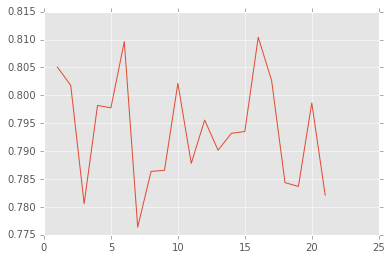

(0.77637242047586208, 7)
(0.78055794063951989, 3)
(0.78211874053662078, 21)
(0.78366879022345382, 19)
(0.78435165819019803, 18)
(0.78636131689056399, 8)
(0.78655145834377183, 9)
(0.78779455631266115, 11)
(0.7901636268343345, 13)
(0.79319340270096084, 14)
(0.79350830750984658, 15)
(0.79555540621972509, 12)
(0.79775357428736815, 5)
(0.79818108556844325, 4)
(0.79863127949730128, 20)
(0.80177262081166389, 2)
(0.80214748607500819, 10)
(0.80265328619481635, 17)
(0.80507328930954491, 1)
(0.80963490219024958, 6)
(0.81041168389992013, 16)


In [30]:
plt.plot(range(1, len(res)+1), res)
plt.show()
res_scores = [(s, i+1) for i, s in enumerate(res)]

for i in sorted(res_scores):
    print(i)

In [38]:
X_train, X_test, y_train, y_test = get_sorted_data('feature6')

clf_log_reg = LogisticRegression(random_state=random_state, n_jobs=-1)

param_grid = {
    'penalty' : ['l1'], # 'l1'
    'C': np.linspace(0.001, 0.1, 50),
#     'solver': ['newton-cg', 'lbfgs', 'sag'] 
}

clf = grid_search_clf(clf_log_reg, param_grid, X_train, y_train)
print('log_loss: {0}'.format(clf_score(clf, X_test, y_test)))

D:\soft\dev\anaconda\lib\site-packages\IPython\kernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from IPython.kernel.zmq import kernelapp as app
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.6min finished


Fitting 3 folds for each of 50 candidates, totalling 150 fits
best score: -0.692236843456
best estimator:
LogisticRegression(C=0.037367346938775511, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
log_loss: 0.690909927596


In [ ]:
# LogisticRegression(C=0.047469387755102045, class_weight=None, dual=False,
#           fit_intercept=True, intercept_scaling=1, max_iter=100,
#           multi_class='ovr', n_jobs=-1, penalty='l1', random_state=42,
#           solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
# log_loss: 0.690922390639


LogisticRegression(C=0.047469387755102045, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

ans = get_ans(clf, X, y, test_data)
ans.to_csv('test_ans10.csv', index=False)

In [17]:
X_train, X_test, y_train, y_test = get_sorted_data(['feature6'])

clf_log_reg = LogisticRegression(random_state=random_state, n_jobs=-1)

param_grid = {
    'penalty' : ['l2'], # 'l1'
    'C': np.linspace(0.00001, 0.01, 30),
    'solver': ['newton-cg', 'lbfgs', 'sag'] 
}

clf = grid_search_clf(clf_log_reg, param_grid, X_train, y_train)
print('log_loss: {0}'.format(clf_score(clf, X_test, y_test)))

# 6 12 : 0.690920832221
# 12 6 : 0.691318383815
# 12 : 0.690991910729

D:\soft\dev\anaconda\lib\site-packages\IPython\kernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from IPython.kernel.zmq import kernelapp as app
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   35.5s finished


Fitting 3 folds for each of 90 candidates, totalling 270 fits
best score: -0.692228101413
best estimator:
LogisticRegression(C=0.0013879310344827587, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
log_loss: 0.691075120097


In [46]:
sorted_data = data.sort(columns='feature6').copy()
rows = data.shape[0]
train = 0.8
X = sorted_data.drop(['target'], axis=1)
y = sorted_data['target']

feature_swapped = np.zeros_like(y)
for i in range(len(y)):
    feature_swapped[i] = y[(i-1) % len(y)]
X['prev_y'] = feature_swapped
    
get_rows = int(rows * train)
X_train, X_test = X[:int(rows * train)], X[int(rows * train):]
y_train, y_test = y[:int(rows * train)], y[int(rows * train):]

D:\soft\dev\anaconda\lib\site-packages\IPython\kernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [47]:
clf_log_reg = LogisticRegression(random_state=random_state, n_jobs=-1)

# sorted by 6: 0.69090865640242882
param_grid = {
    'penalty' : ['l1'], # 'l1'
    'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]
}

clf = grid_search_clf(clf_log_reg, param_grid, X_train, y_train)
clf_score(clf, X_test, y_test)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
best score: -0.692287561903
best estimator:
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   12.9s finished


0.69096064685510616

In [48]:
clf.best_estimator_.coef_

array([[-0.03774954,  0.15064837, -0.1205362 ,  0.09606156,  0.        ,
         0.06033912,  0.        ,  0.0463998 , -0.02639309,  0.05249634,
         0.08075209,  0.08826784,  0.        , -0.24334051,  0.10054654,
         0.07226265,  0.13067086,  0.0774316 ,  0.04856857, -0.02601462,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.01759762]])

In [6]:
# Submitting model using previous data

data = pd.read_csv('./../data/nai_train_2.csv')
test_data = pd.read_csv('./../data/nai_test_2.csv')
feature = ['feature6', 'feature1']

def get_sorted_data_with_swap(data, feature):
    sorted_data = data.sort(columns=feature).copy()
    X = sorted_data.drop('target', axis=1) if 'target' in sorted_data.columns else sorted_data
    y = []
    rows = X.shape[0]
    
    if 'target' in sorted_data.columns:
        y = sorted_data['target']
        
    for col in X.columns:
        if col == 't_id':
            continue
        feature_swapped = [0. for i in range(rows)] # np.zeros() дает друго результат о_0... хотя отличий быть не должно
        for i in range(rows):
            feature_swapped = X[col][(i-1) % rows]
        X['prev_' + col] = feature_swapped

    return X, y

X, y = get_sorted_data_with_swap(data, feature)
test_data_added, __ = get_sorted_data_with_swap(test_data, feature)

D:\soft\dev\anaconda\lib\site-packages\IPython\kernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [8]:
clf_log_reg = LogisticRegression(random_state=random_state, n_jobs=-1)

param_grid = {
    'penalty' : ['l1'], # 'l1'
    'C': [0.0001, 0.001, 0.01, 0.03, 0.07, 1, 3, 7, 10, 100, 1000]
}


clf = grid_search_clf(clf_log_reg, param_grid, X, y)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:  3.7min finished


In [9]:
X_real_test = test_data_added.drop(['t_id'], axis=1)
real_pred = clf.predict_proba(X_real_test)
pred = [it[1] for it in real_pred]
ans = pd.DataFrame(test_data_added['t_id'])
ans['probability'] = pred
ans.to_csv('test_ans11.csv', index=False)

In [10]:
clf.best_estimator_.coef_

array([[ 0.        ,  0.14112058, -0.02804596,  0.01002109,  0.        ,
         0.        ,  0.        ,  0.02847843,  0.        ,  0.03892122,
         0.09453681,  0.05973611,  0.        , -0.14020511,  0.10569454,
         0.04750205,  0.12382094,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [ ]:
train = 0.8
rows = X.shape[0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state)

clf_log_reg = LogisticRegression(random_state=random_state, n_jobs=-1)

param_grid = {
    'penalty' : ['l1'], # 'l1'
    'C': [0.0001, 0.001, 0.01, 0.03, 0.07, 1, 3, 7, 10, 100, 1000]
}


clf2 = grid_search_clf(clf_log_reg, param_grid, X_train, y_train)
print('log_loss: {0}'.format(clf_score(clf, X_test, y_test)))